# Non-Linear Modeling in Python

In this lab, we demonstrate some of the nonlinear models discussed in chapter 7 of ISLP. We use [the Wage data](https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv) as a running example, and show that
many of the complex non-linear ftting procedures discussed can easily be implemented in `Python`.

As usual, we start with some of our standard imports.

In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import statsmodels.api as sm

Here we import the libraries necessary for Polynomial Regression, Step Functions, Spline, and Generalized Additive Models (GAM) in Python using popular libraries such as `scikit-learn`, `patsy`, and `pygam`.

In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from patsy import dmatrix
from pygam import (s as s_gam, l as l_gam, f as f_gam, LinearGAM, LogisticGAM, te)

## Load Wage Data

In [8]:
wage=pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/master/Notebooks/Data/Wage.csv")
wage.head()

,Unnamed: 0,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [41]:
wage.isnull().sum()

Unnamed: 0    0
year          0
age           0
sex           0
maritl        0
race          0
education     0
region        0
jobclass      0
health        0
health_ins    0
logwage       0
wage          0
dtype: int64

In [43]:
# Drop rows with missing or infinite values
wage = wage.dropna()
wage = wage.replace([np.inf, -np.inf], np.nan).dropna()

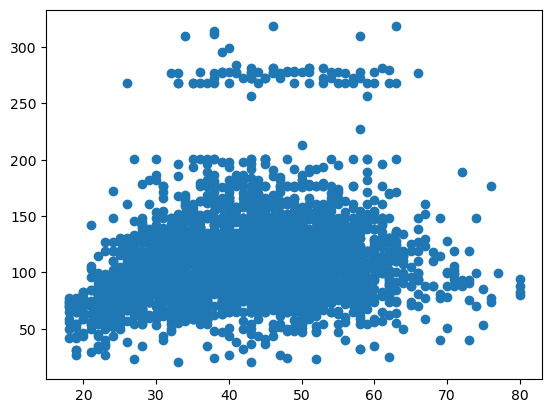

In [45]:
X = wage['age']
y = wage['wage']
plt.scatter(X, y)
plt.show()

To construct the polynomial, we use the [power function](https://numpy.org/doc/stable/reference/generated/numpy.power.html) in the `numpy` library. With polynomial regression we must decide on the degree of the polynomial to use. Sometimes we just wing it, and decide to use second or third 
degree polynomials, simply to obtain a nonlinear ift.mplex model. 118.

In [46]:
# Fit degree 2 polynomial regression model
X2 = PolynomialFeatures(2).fit_transform(X.values.reshape(-1,1))

regr = LinearRegression()
regr.fit(X = X2, y = wage['wage'])

LinearRegression()

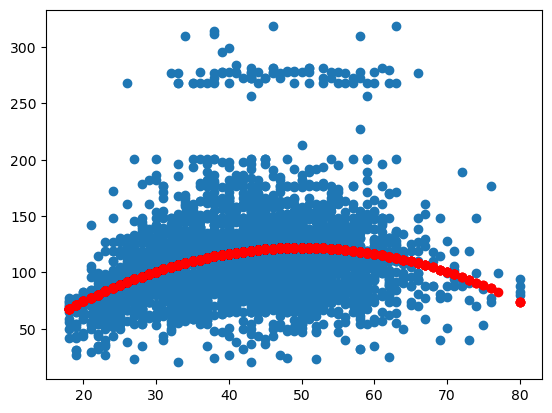

In [47]:
pred = regr.predict(X2)
plt.scatter(X, y)
plt.scatter(X, pred, c='r')
plt.show()

In [48]:
# Fit degree 3 polynomial regression model
X3 = PolynomialFeatures(3).fit_transform(X.values.reshape(-1,1))

regr = LinearRegression()
regr.fit(X = X3, y = wage['wage'])

LinearRegression()

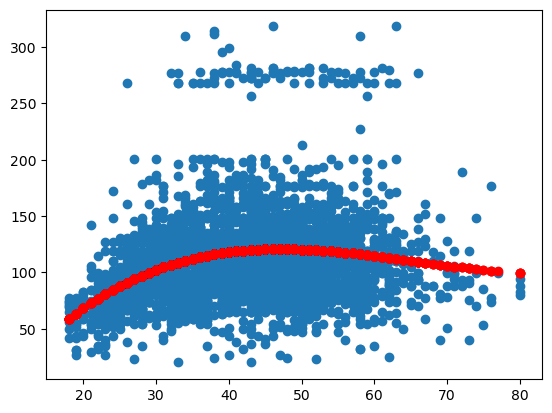

In [49]:
pred = regr.predict(X3)
plt.scatter(X, y)
plt.scatter(X, pred, c='r')
plt.show()

In [50]:
X1 = PolynomialFeatures(1).fit_transform(X.values.reshape(-1,1))
X2 = PolynomialFeatures(2).fit_transform(X.values.reshape(-1,1))
X3 = PolynomialFeatures(3).fit_transform(X.values.reshape(-1,1))
X4 = PolynomialFeatures(4).fit_transform(X.values.reshape(-1,1))
X5 = PolynomialFeatures(5).fit_transform(X.values.reshape(-1,1))

# Polynomial regression model of degree 4
fit = sm.GLS(y, X4).fit()
fit.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,-184.1542,60.040,-3.067,0.002,-301.879,-66.430
x1,21.2455,5.887,3.609,0.000,9.703,32.788
x2,-0.5639,0.206,-2.736,0.006,-0.968,-0.160
x3,0.0068,0.003,2.221,0.026,0.001,0.013
x4,-3.204e-05,1.64e-05,-1.952,0.051,-6.42e-05,1.45e-07


But we can make such a decision in a more systematic way. One way to do this is through hypothesis tests, which we demonstrate here. We now ft a series of models ranging from linear (degree-one) to degree-eight polynomials, and look to determine the simplest model that is sufficient to explain the relationship between `wage` and `age`. We use the `anova_lm()` function, which performs a series of ANOVA tests. An analysis of variance or ANOVA tests the null hypothesis that a model $M_1$ is sufficient to explain the data against the alternative hypothesis that a more complex model $M_2$ is required. The determination is based on an *F*-test. To perform the test, the models $M_1$ and $M_2$ must be *nested*: the space spanned by the predictors in $M_1$ must be a subspace of the space spanned by the predictors in $M_2$. In this case, we fit eight different polynomial models and sequentially compare the simpler model to the more complex model.

In [51]:
# ANOVA
fit_1 = sm.GLS(y, X1).fit()
fit_2 = sm.GLS(y, X2).fit()
fit_3 = sm.GLS(y, X3).fit()
fit_4 = sm.GLS(y, X4).fit()
fit_5 = sm.GLS(y, X5).fit()


sm.stats.anova_lm(fit_1, fit_2, fit_3, fit_4, fit_5, typ=1)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


The p-value comparing the linear `models[0]` to the quadratic `models[1]` is essentially zero, indicating that a linear ft is not sufficient. Indexing starting at zero is confusing for the polynomial degree example, since `models[1]` is quadratic rather than linear! Similarly the *p*-value comparing the quadratic `models[1]` to the cubic `models[2]` is very low (0.0017), so the quadratic fit is also insufficient. The *p*-value comparing the cubic and degree-four polynomials, `models[2]` and `models[3]`, is approximately 5%, while the degree-five polynomial `models[4]` seems unnecessary because its *p*-value is 0.37. Hence, either a cubic or a quartic polynomial appear to provide a reasonable fit to the data, but lower- or higher-order models are not justifed.

## Step Function

In order to fit a step function, we first use the [`pd.qcut()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) function to discretize `age` based on quantiles. Then we use `pd.get_dummies()` to create the columns of the model matrix for this categorical variable. Note that this function will include all columns for a given categorical, rather than the usual approach which drops one of the levels

In [52]:
cut_age = pd.qcut(X, 4)
sm.OLS(y, pd.get_dummies(cut_age)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     63.30
Date:                Tue, 19 Mar 2024   Prob (F-statistic):           1.12e-39
Time:                        07:05:32   Log-Likelihood:                -15358.
No. Observations:                3000   AIC:                         3.072e+04
Df Residuals:                    2996   BIC:                         3.075e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
(17.999, 33.75]    94.1584      1.478     63.692      0.000      91.260      97.057
(33.75, 42.0]     116.6608      1.470     79.385      0.000     113.779     119.542
(42.0, 51.0]      119.1887      1.416     84.147      0.000     116.411     121.966
(51.0, 80.0]      116.5717      1.559     74.751      0.000     113.514     119.629
==============================================================================
Omnibus:                     1062.319   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4546.061
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.006   Cond. No.                         1.10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Here `pd.qcut()` automatically picked the cutpoints based on the quantiles 25%, 50% and 75%, which results in four regions. We could also have specifed our own quantiles directly instead of the argument `4`. For cuts not based on quantiles we would use the `pd.cut`() function. The function `pd.qcut`() and `pd.cut()`) returns an ordered categorical variable. The regression model then creates a set of dummy variables for use in the regression. Since age is the only variable in the model, the value $94,158.40 is the average salary for those under 33.75 years of age, and the other coefcients are the average salary for those in the other age groups

## Splines

In order to fit regression splines, we use transforms from the `ISLP` package. The actual spline evaluation functions are in the [`scipy.interpolate package`](https://docs.scipy.org/doc/scipy/reference/interpolate.html); we have simply wrapped them as transforms similar to `Poly()` and `PCA()`. In Section 7.4, we saw that regression splines can be fit by constructing an appropriate matrix of basis functions. The `BSpline()` function generates the entire matrix of basis functions for splines with the specifed set of knots. By default, the B-splines produced are cubic. To change the degree, use the argument degree

In [63]:
from ISLP.models import (summarize, poly, ModelSpec as MS)
from ISLP.transforms import (BSpline, NaturalSpline)
from ISLP.models import bs, ns

In [64]:
bs_ = BSpline(internal_knots=[25,40,60], intercept=True).fit(age)
bs_age = bs_.transform(age)
bs_age.shape

(3000, 7)

This results in a seven-column matrix, which is what is expected for a cubicspline basis with 3 interior knots. We can form this same matrix using the `bs()` object, which facilitates adding this to a model-matrix builder (as in `poly()` versus its workhorse `Poly()`) described in Section 7.8.1. We now fit a cubic spline model to the `Wage` data

In [66]:
bs_age = MS([bs('age', internal_knots=[25,40,60])])
Xbs = bs_age.fit_transform(wage)
M = sm.OLS(y, Xbs).fit()
summarize(M)

C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

,coef,std err,t,P>|t|
intercept,60.4937,9.460,6.394,0.000
"bs(age, internal_knots=[25, 40, 60])[0]",3.9805,12.538,0.317,0.751
"bs(age, internal_knots=[25, 40, 60])[1]",44.6310,9.626,4.636,0.000
"bs(age, internal_knots=[25, 40, 60])[2]",62.8388,10.755,5.843,0.000
"bs(age, internal_knots=[25, 40, 60])[3]",55.9908,10.706,5.230,0.000
"bs(age, internal_knots=[25, 40, 60])[4]",50.6881,14.402,3.520,0.000
"bs(age, internal_knots=[25, 40, 60])[5]",16.6061,19.126,0.868,0.385


The column names are a little cumbersome, and have caused us to truncate the printed summary. They can be set on construction using the name argument as follows.

In [68]:
bs_age = MS([bs('age',
internal_knots=[25,40,60], name='bs(age)')])
Xbs = bs_age.fit_transform(wage)
M = sm.OLS(y, Xbs).fit()
summarize(M)

C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

,coef,std err,t,P>|t|
intercept,60.4937,9.460,6.394,0.000
bs(age)[0],3.9805,12.538,0.317,0.751
bs(age)[1],44.6310,9.626,4.636,0.000
bs(age)[2],62.8388,10.755,5.843,0.000
bs(age)[3],55.9908,10.706,5.230,0.000
bs(age)[4],50.6881,14.402,3.520,0.000
bs(age)[5],16.6061,19.126,0.868,0.385


Notice that there are 6 spline coefcients rather than 7. This is because, by default, `bs()` assumes `intercept=False`, since we typically have an overall intercept in the model. So it generates the spline basis with the given knots, and then discards one of the basis functions to account for the intercept. We could also use the `df` (degrees of freedom) option to specify the complexity of the spline. We see above that with 3 knots, the spline basis has 6 columns or degrees of freedom. When we specify `df=6` rather than the actual knots, `bs()` will produce a spline with 3 knots chosen at uniform quantiles of the training data. We can see these chosen knots most easily using `Bspline()` directly:

In [69]:
 BSpline(df=6).fit(age).internal_knots_

array([33.75, 42.  , 51.  ])

When asking for six degrees of freedom, the transform chooses knots at ages 33.75, 42.0, and 51.0, which correspond to the 25th, 50th, and 75th percentiles of `age`. When using B-splines we need not limit ourselves to cubic polynomials
(i.e. degree=3). For instance, using `degree=0` results in piecewise constant functions, as in our example with `pd.qcut()` above.

In [70]:
bs_age0 = MS([bs('age',
df=3,
degree=0)]).fit(wage)
Xbs0 = bs_age0.transform(wage)
summarize(sm.OLS(y, Xbs0).fit())

C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

,coef,std err,t,P>|t|
intercept,94.1584,1.478,63.687,0.0
"bs(age, df=3, degree=0)[0]",22.3490,2.152,10.388,0.0
"bs(age, df=3, degree=0)[1]",24.8076,2.044,12.137,0.0
"bs(age, df=3, degree=0)[2]",22.7814,2.087,10.917,0.0


This fit should be compared with the cell where we use `qcut()` to create four bins by cutting at the 25%, 50% and 75% quantiles of age. Since we specifed `df=3` for degree-zero splines here, there will also be knots at the same three quantiles. Although the coefcients appear diferent, we see that this is a result of the diferent coding. For example, the first coefficient is
identical in both cases, and is the mean response in the first bin. For the second coefcient, we have 94.158 + 22.349 = 116.507 ≈ 116.611, the latter being the mean. Here the intercept is coded by a column of ones, so the second, third and fourth coefcients are increments for those bins. Why is the sum not exactly the same? It turns out that the `qcut()` uses $\leq$, while `bs()` uses $\lt$ when deciding bin membership. In order to fit a natural spline, we use the `NaturalSpline()` transform 
with the corresponding helper `ns()`. Here we fit a natural spline with five degrees of freedom (excluding the intercept) and plot the results.

In [71]:
ns_age = MS([ns('age', df=5)]).fit(wage)
M_ns = sm.OLS(y, ns_age.transform(wage)).fit()
summarize(M_ns)

C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
C:\Users\uky994\AppData\Local\anaconda3\Lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]

,coef,std err,t,P>|t|
intercept,60.4752,4.708,12.844,0.000
"ns(age, df=5)[0]",61.5267,4.709,13.065,0.000
"ns(age, df=5)[1]",55.6912,5.717,9.741,0.000
"ns(age, df=5)[2]",46.8184,4.948,9.463,0.000
"ns(age, df=5)[3]",83.2036,11.918,6.982,0.000
"ns(age, df=5)[4]",6.8770,9.484,0.725,0.468


We now create a grid of values for age at which we want predictions.

In [75]:
age_grid = np.linspace(age.min(), age.max(), 100)
age_df = pd.DataFrame({'age': age_grid})

We now plot the natural spline using our plotting function

In [78]:
def plot_wage_fit(age_df,
                  basis,
                  title):
    
    X = basis.transform(wage)
    Xnew = basis.transform(age_df)
    M = sm.OLS(y, X).fit()
    preds = M.get_prediction(Xnew)
    bands = preds.conf_int(alpha=0.05)
    fig, ax = subplots(figsize=(8,8))
    ax.scatter(age,
               y,
               facecolor='gray',
               alpha=0.5)
    
    for val, ls in zip([preds.predicted_mean ,
                        bands[:,0],
                        bands[:,1]],
                       ['b','r--','r--']):
        ax.plot(age_df.values, val, ls, linewidth=3)
        ax.set_title(title, fontsize=20)
        ax.set_xlabel('Age', fontsize=20)
        ax.set_ylabel('Wage', fontsize=20);
        return ax

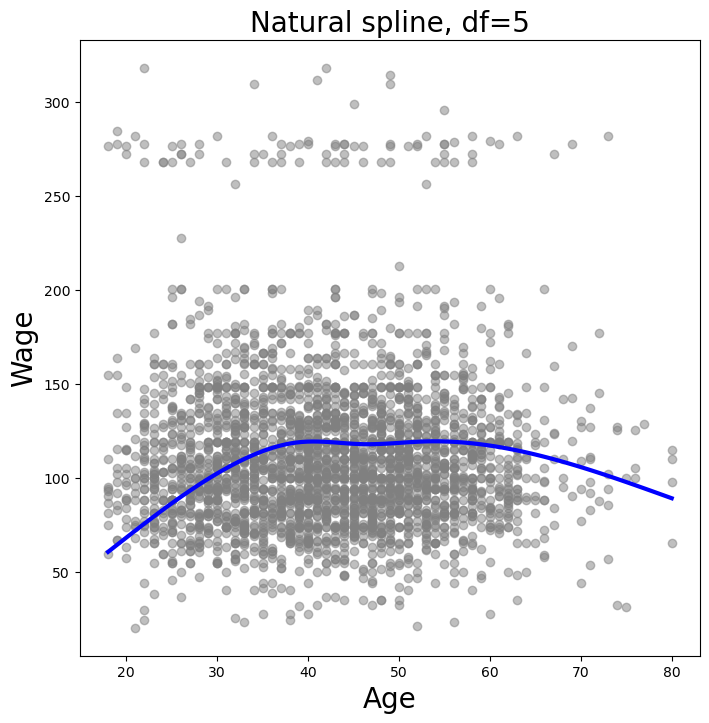

In [79]:
plot_wage_fit(age_df, ns_age, 'Natural spline, df=5');